# Practica 4

## Analisis con 

In [1]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161566 entries, 0 to 2161565
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 98.9+ MB


In [4]:
df.describe()

,id,store_nbr,sales,onpromotion
count,2.161566e+06,2.161566e+06,2.161566e+06,2.161566e+06
mean,1.080782e+06,2.750000e+01,3.172669e+02,1.039344e+00
std,6.239905e+05,1.558579e+01,1.001231e+03,7.711633e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.403912e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.080782e+06,2.750000e+01,7.000000e+00,0.000000e+00
75%,1.621174e+06,4.100000e+01,1.702735e+02,0.000000e+00
max,2.161565e+06,5.400000e+01,8.743852e+04,7.100000e+02


## Propuesta y solucion

In [5]:
len(df['store_nbr'].unique())

54

In [6]:
len(df['date'].unique())

1213

In [7]:
df['mes'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,mes
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [8]:
len(df['mes'].unique())

40

In [21]:
agrup_tiendas=df.groupby('store_nbr').agg({
    'sales':'sum',
})
agrup_tiendas.head(4)

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07


In [22]:
agrup_tiendas.describe()

,sales
count,5.400000e+01
mean,1.269988e+07
std,8.858355e+06
min,0.000000e+00
25%,7.091574e+06
50%,1.063859e+07
75%,1.625086e+07
max,4.063205e+07


<Axes: >

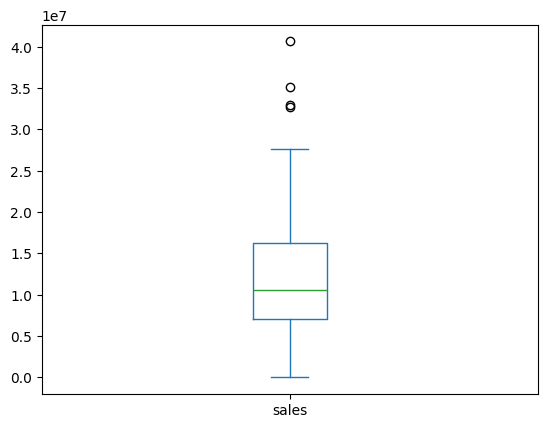

In [23]:
agrup_tiendas.plot.box()

In [25]:
agrup_tiendas_sort = agrup_tiendas.sort_values('sales',ascending=False)
agrup_tiendas_sort

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07


In [28]:
top_5_tiendas = agrup_tiendas_sort.head(5)
top_5_tiendas

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07


In [30]:
df_top5 = df[df['store_nbr'].isin(top_5_tiendas.index)]
df_top5

,id,date,store_nbr,family,sales,onpromotion,mes
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0,2013-01
...,...,...,...,...,...,...,...
2161165,2161165,2016-04-30,47,POULTRY,1687.844,1,2016-04
2161166,2161166,2016-04-30,47,PREPARED FOODS,431.271,0,2016-04
2161167,2161167,2016-04-30,47,PRODUCE,7533.308,1,2016-04
2161168,2161168,2016-04-30,47,SCHOOL AND OFFICE SUPPLIES,11.000,0,2016-04


In [32]:
top5_mes = df_top5.groupby(['store_nbr','mes']).agg({
    'sales':'sum',
}).reset_index()
top5_mes

,store_nbr,mes,sales
0,3,2013-01,4.965743e+05
1,3,2013-02,4.296186e+05
2,3,2013-03,5.316862e+05
3,3,2013-04,5.120721e+05
4,3,2013-05,5.181973e+05
...,...,...,...
195,47,2015-12,1.264874e+06
196,47,2016-01,1.154481e+06
197,47,2016-02,1.028481e+06
198,47,2016-03,1.078566e+06


## Multilineas

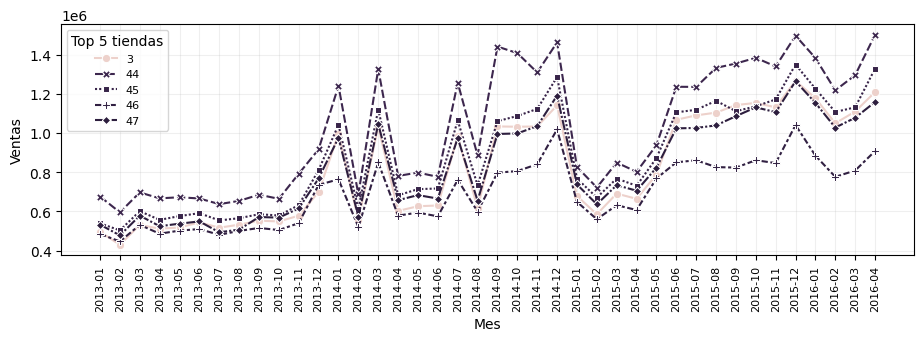

In [45]:
ax = sns.lineplot(
    data=top5_mes,
    x='mes',
    y='sales',
    hue='store_nbr',
    style='store_nbr',
    markers=True,
    #palette='Sel1'
)
ax.tick_params(
    axis='x',
    labelrotation=90,
    labelsize=8,
)
ax.grid(
    visible=True,
    axis='x',
    alpha=0.2,
)
ax.grid(
    visible=True,
    axis='y',
    alpha=0.2,
)
ax.legend(
    title='Top 5 tiendas',
    fontsize=8,
)
ax.set_ylabel('Ventas')
ax.set_xlabel('Mes')

fig = ax.get_figure()
fig.set_size_inches(11,3)

In [46]:
# Puedo manejar los estilos en un diccionario que tenga como claves las categorias (tiendas) y como valor 
# los estilos de las líneas que quiero que tenga cada tienda en el siguiente orden: 
# [color, opacidad, marcador, estilo de linea, ancho de linea]
estilos_por_tienda = {
    44: ['grey', 0.4, '+', '--', 1],
    45: ['grey', 0.4, 's', '--', 1],
    47: ['grey', 0.4, 'x', '--', 1],
    3:  ['red', 1, 'o', '-', 1.5],
    46: ['grey', 0.4, 'D', '--', 1]
}

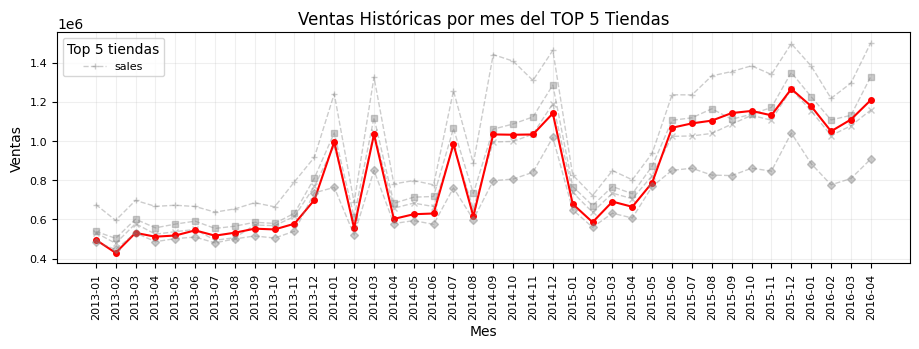

In [49]:
# Creo un canvas vacio
fig2, ax2 = plt.subplots()

# Itero sobre mis tiendas
for tienda in [44, 45, 47, 3, 46]:
    # Obtengo el estilo de esa tienda
    estilos = estilos_por_tienda[tienda]
    # Filtro el dataframe con la tienda que estoy iterando actualmente
    df_tmp = top5_mes[top5_mes['store_nbr'] == tienda]
    
    # Hago un gráfico de lineas solo de esa tienda
    ax2.plot(
        df_tmp['mes'], 
        df_tmp['sales'], 
        label = tienda,
        markersize = 4,
        color = estilos[0],
        alpha = estilos[1],
        marker = estilos[2], 
        linestyle = estilos[3],
        linewidth = estilos[4], 
    )
    
    # En la siguiente iteración avanzaré a la siguiente tienda
    # El truco esta en que estoy dibujando todo en el mismo ax2! 
    
# Copiamos las mismas configuraciones de personalizacion...
ax2.tick_params(
    axis='x', 
    labelrotation = 90,
    labelsize = 8
)

ax2.tick_params(
    axis='y', 
    labelsize = 8
)

ax2.grid(
    visible=True,
    axis='x',
    alpha=0.2
)

ax2.grid(
    visible=True,
    axis='y',
    alpha=0.2
)

ax2.legend(
    title='Top 5 tiendas',
    labels=top_5_tiendas,
    bbox_to_anchor=(0, 1), 
    fontsize=8,
    loc='upper left'
)

ax2.set_ylabel('Ventas')
ax2.set_xlabel('Mes')
ax2.set_title('Ventas Históricas por mes del TOP 5 Tiendas')
    
fig2.set_size_inches(11, 3)